In [1]:
import keras
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib as pl
from keras.layers.core import Dense, Dropout, Activation
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, Flatten
from keras.layers.normalization import layer_normalization
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
from keras.models import Sequential
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive #case mounted gdrive
drive.mount('/content/gdrive', force_remount=False)

Mounted at /content/gdrive


In [3]:
class_names = ['No', 'Yes']

In [6]:
path = "/content/gdrive/MyDrive/Colab Notebooks/Final"
files = os.listdir(path)
categories = []

for filename in files:
    category = filename.split('.')[0]
    if 'No' in category:
        categories.append("0")
    elif 'Yes' in category:
        categories.append("1")
    
        
    else: pass
df = pd.DataFrame({
    'filename': files,
    'category': categories
})


In [7]:
print(df.head(14))

         filename category
0     Yes (1).jpg        1
1   Yes (230).png        1
2     Yes (6).jpg        1
3     Yes (5).jpg        1
4     Yes (9).jpg        1
5   Yes (233).png        1
6   Yes (240).png        1
7   Yes (238).png        1
8     Yes (8).jpg        1
9    No (169).png        0
10    Yes (3).jpg        1
11   No (170).png        0
12  Yes (232).png        1
13  Yes (235).png        1


In [8]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

X =  np.empty([0])
y = np.empty([0])
for filename in files:
    print(path+"/"+filename)
    # load the image
    #img = load_img(path+"/"+filename)
    img = cv2.imread(path+"/"+filename)
    img = cv2.resize(img,(200,200))

    #print(type(img))
    #print(img.format)
    #print(img.mode)
    print(img.size)
    #img.show()


    # convert to numpy array matrix  pixcel to row colum 
    img_array = img_to_array(img)   
   
    X = np.append (X,img_array)
    category = filename.split('.')[0]
    if 'No' in category:
        y = np.append(y,[0])
    elif 'Yes' in category:
        y = np.append(y,[1])
    
    
        
    else: pass

/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (1).jpg
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (230).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (6).jpg
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (5).jpg
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (9).jpg
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (233).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (240).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (238).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (8).jpg
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/No (169).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (3).jpg
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/No (170).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (232).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (235).png
120000
/content/gdrive/MyDrive/Colab Notebooks/Final/Yes (228).png
120000
/content/

In [9]:
X

array([165., 174., 161., ...,  30.,  30.,  25.])

In [10]:
X = X.reshape(len(y),200,200,3) 
x_vector = 200*200*3

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

print(type(X_train))
print(type(y_train))

len_train  = len(X_train)
len_test = len(X_test)

X_train shape (243, 200, 200, 3)
y_train shape (243,)
X_test shape (105, 200, 200, 3)
y_test shape (105,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [12]:
X_train = X_train.reshape(len_train, x_vector) 
X_test = X_test.reshape(len_test, x_vector)   

X_train = X_train.astype('float32')   # change integers to 32-bit floating point numbers
X_test = X_test.astype('float32')

X_train /= 255                    
X_test /= 255  # it is good practice to normalize the pixel values so that each pixel value has a value between 0 and 1

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)

Training matrix shape (243, 120000)
Testing matrix shape (105, 120000)


In [13]:
nb_classes = 2 # number of unique digits

Y_train = np_utils.to_categorical(y_train, nb_classes) #Converts a class vector (integers) to binary class matrix.
Y_test = np_utils.to_categorical(y_test, nb_classes)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

y_train shape (243,)
y_test shape (105,)


In [14]:
#Neural Network using Tensorflow
model = Sequential()
model.add(Dense(256, input_shape=(x_vector,))) 
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Dense(2))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               30720256  
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 activation_1 (Activation)   (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
 activation_2 (Activation)   (None, 2)                 0         
                                                                 
Total params: 30,736,834
Trainable params: 30,736,834


In [15]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=15, validation_data=(X_test, Y_test))

Epoch 1/15
25/25 [==============================] - 4s 37ms/step - loss: 10.4860 - accuracy: 0.6379 - val_loss: 8.0313 - val_accuracy: 0.6381
Epoch 2/15
25/25 [==============================] - 1s 22ms/step - loss: 5.4263 - accuracy: 0.7737 - val_loss: 6.6729 - val_accuracy: 0.9714
Epoch 3/15
25/25 [==============================] - 1s 22ms/step - loss: 1.6270 - accuracy: 0.9712 - val_loss: 6.4589 - val_accuracy: 0.8286
Epoch 4/15
25/25 [==============================] - 1s 22ms/step - loss: 3.2618 - accuracy: 0.9383 - val_loss: 1.9701 - val_accuracy: 0.9905
Epoch 5/15
25/25 [==============================] - 1s 22ms/step - loss: 0.4969 - accuracy: 0.9877 - val_loss: 0.6648 - val_accuracy: 0.9905
Epoch 6/15
25/25 [==============================] - 1s 26ms/step - loss: 0.1631 - accuracy: 0.9918 - val_loss: 0.7567 - val_accuracy: 0.9810
Epoch 7/15
25/25 [==============================] - 1s 22ms/step - loss: 0.4897 - accuracy: 0.9877 - val_loss: 0.6330 - val_accuracy: 0.9905
Epoch 8/15
2

In [17]:
score = model.evaluate(X_train, Y_train, verbose = 0)
print('Train loss : ', score[0])
print('Train accuracy : ', score[1])

Train loss :  3.63517119694734e-06
Train accuracy :  1.0


In [18]:
score1 = model.evaluate(X_test, Y_test, verbose = 0)
print('Test loss : ', score1[0])
print('Test accuracy : ', score1[1])

Test loss :  0.5967769622802734
Test accuracy :  0.9904761910438538


In [19]:
import keras
print(keras.backend.backend()) 
import tensorflow as tf
print(tf.__version__)

tensorflow
2.7.0


In [20]:
tf.keras.Sequential([model,tf.keras.layers.Softmax()])
result = model.predict(X_test) 
for i in range(5):
  print(np.argmax(result[i]))

0
0
1
0
0


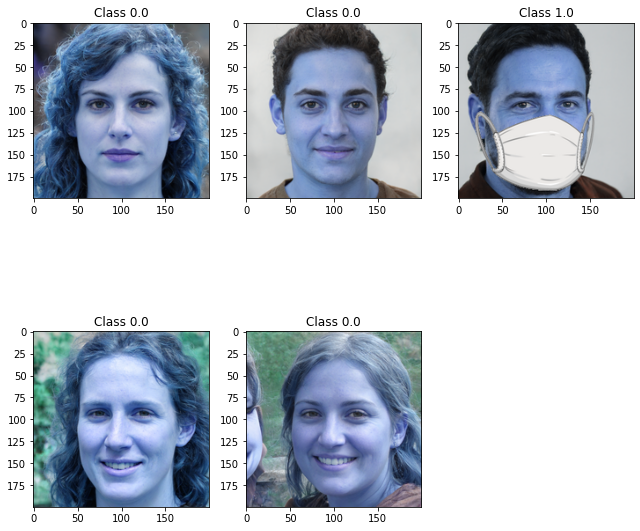

In [21]:
plt.rcParams['figure.figsize'] = (9,9) # change figure size to plot graph

for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(X_test[i].reshape(200,200,3))
    plt.title("Class {}".format(y_test[i]))  
plt.tight_layout()

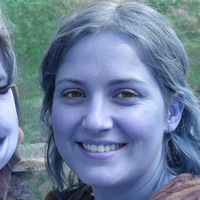

In [22]:
from keras.preprocessing.image import array_to_img
image_show = array_to_img(X_test[4].reshape(200,200,3))
image_show

In [23]:
print(class_names [np.argmax( [result[4] ] ) ])

No


In [ ]:
#model.save("/content/gdrive/MyDrive/Colab Notebooks/PJ/pima4_model.h5")
#print("Saved model.")